![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  

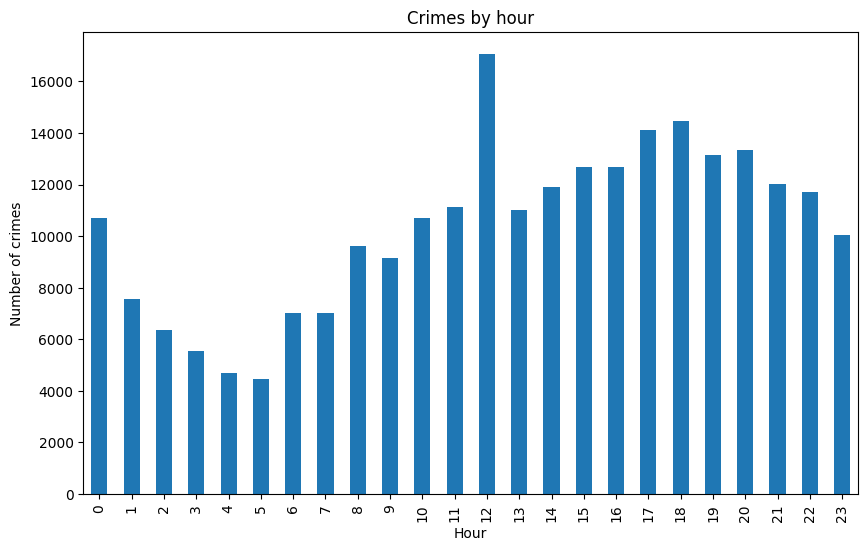

In [4]:
# extract hour from time - first two characters
crimes["hour"] = crimes["TIME OCC"].str[:2].astype(int)
print(crimes.head())

# count of crimes by hour
print(crimes["hour"].value_counts().sort_index())

# plot crimes by hour
crimes["hour"].value_counts().sort_index().plot.bar(figsize=(10, 6))
plt.xlabel("Hour")
plt.ylabel("Number of crimes")
plt.title("Crimes by hour")
plt.show()



In [5]:
# peak crime hour
peak_crime_hour = crimes["hour"].value_counts().idxmax()
print(peak_crime_hour)

12


        DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME        Crm Cd Desc  \
9   231207476 2023-02-27 2020-08-15     0001  77th Street           BURGLARY   
12  221711184 2022-06-15 2020-05-15     0155   Devonshire  THEFT OF IDENTITY   
36  221314362 2022-07-11 2020-04-07     0001       Newton  THEFT OF IDENTITY   
39  231307252 2023-03-03 2020-07-05     2305       Newton  THEFT OF IDENTITY   
42  221614254 2022-11-13 2020-01-01     0001     Foothill  THEFT OF IDENTITY   

    Vict Age Vict Sex Vict Descent Weapon Desc  Status Desc  \
9         72        M            B         NaN  Invest Cont   
12        27        M            B         NaN  Invest Cont   
36        53        F            H         NaN  Invest Cont   
39        22        F            B         NaN  Invest Cont   
42        22        F            H         NaN  Invest Cont   

                                    LOCATION  hour  
9    8800    HAAS                         AV     0  
12   8300    WHITE OAK            

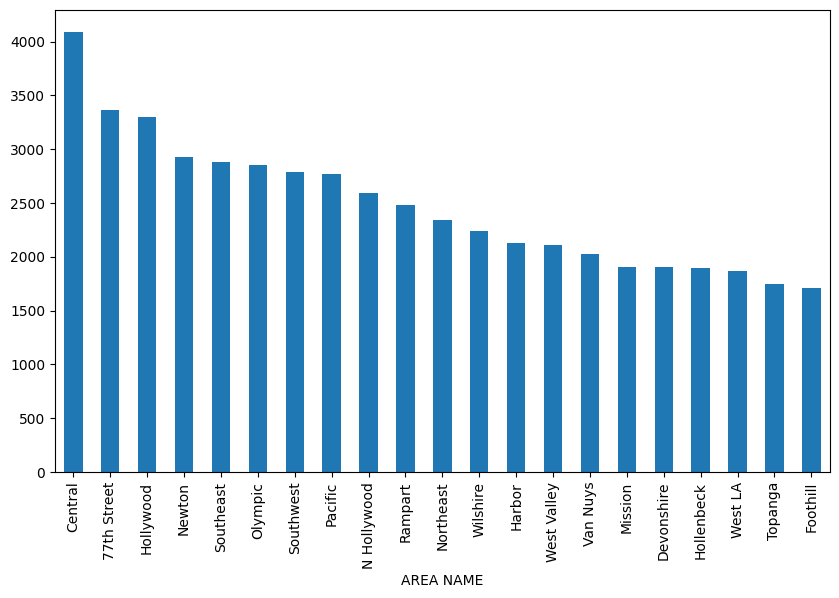

In [10]:
# filter crimes by night - between 10pm and 03:59am
night_crimes = crimes[(crimes["hour"] >= 22) | (crimes["hour"] < 4)]
print(night_crimes.head())

# plot night crime by area
night_crimes["AREA NAME"].value_counts().plot.bar(figsize=(10, 6))

# area with largest number of night crimes
peak_night_crime_location = night_crimes["AREA NAME"].value_counts().idxmax()
print(peak_night_crime_location)

       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  

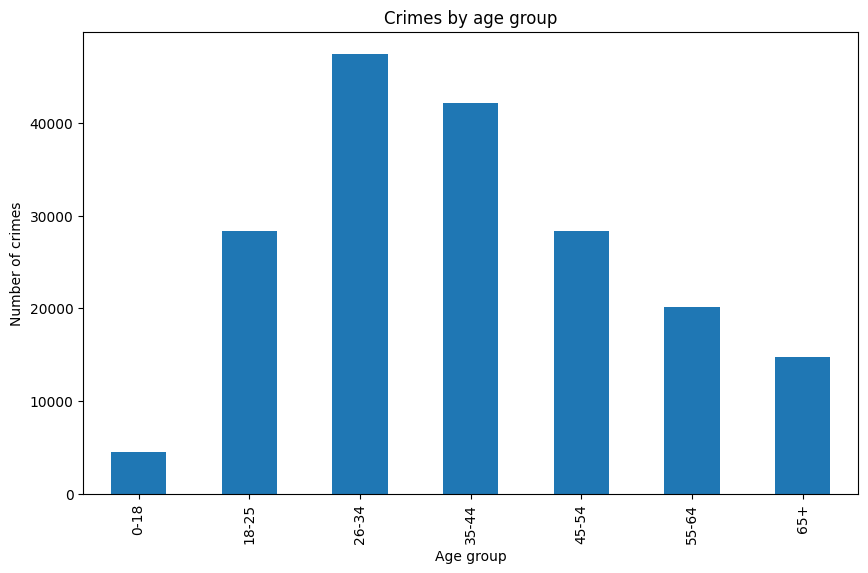

Vict Age Group
0-18      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


In [19]:
# create age groups
victim_age_groups = pd.cut(crimes["Vict Age"], bins=[0, 17, 25, 34, 44, 54, 64, np.inf], labels=["0-18", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"])
#print(victim_age_groups.head())

# add age groups to crimes dataframe
crimes["Vict Age Group"] = victim_age_groups
print(crimes.head())

# plot crimes by age group
crimes["Vict Age Group"].value_counts().sort_index().plot.bar(figsize=(10, 6))
plt.xlabel("Age group")
plt.ylabel("Number of crimes")
plt.title("Crimes by age group")
plt.show()

# crime by age group
victim_ages = crimes["Vict Age Group"].value_counts().sort_index()
print(victim_ages)
